<a href="https://colab.research.google.com/github/pinarrcindemirr/ML_Q1122408/blob/main/ML_Q1122408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time-Series Forecasting for Household Energy Consumption

Author: Q1122408-Pinar Cindemir

Course: Machine Learning

In [1]:
# Download dataset from UCI repository
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip

# Unzip the dataset
!unzip household_power_consumption.zip


--2026-01-25 15:38:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘household_power_consumption.zip’

household_power_con     [       <=>          ]  19.68M  11.5MB/s    in 1.7s    

2026-01-25 15:38:46 (11.5 MB/s) - ‘household_power_consumption.zip’ saved [20640916]

Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [2]:
import pandas as pd

df=pd.read_csv("household_power_consumption.txt",
    sep=";",
    na_values=["?"],
    low_memory=False
               )

In [3]:
print(df.shape)
df.head()

(2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
print(df.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00   

# DATA PREPROCESSING

* Missing Value Handling



In [5]:
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Date                     0.000000
Time                     0.000000
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


In [6]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                dayfirst=True)
df = df.set_index('Datetime')
cols = df.columns.drop(['Date', 'Time'])

df[cols] = df[cols].astype(float)
df[cols] = df[cols].interpolate(method='time')
df[cols] = df[cols].ffill()

In [7]:
df[cols].isna().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


* Handling with Duplicate Value

In [8]:
df.index.duplicated().sum()

np.int64(0)

In [9]:
features = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

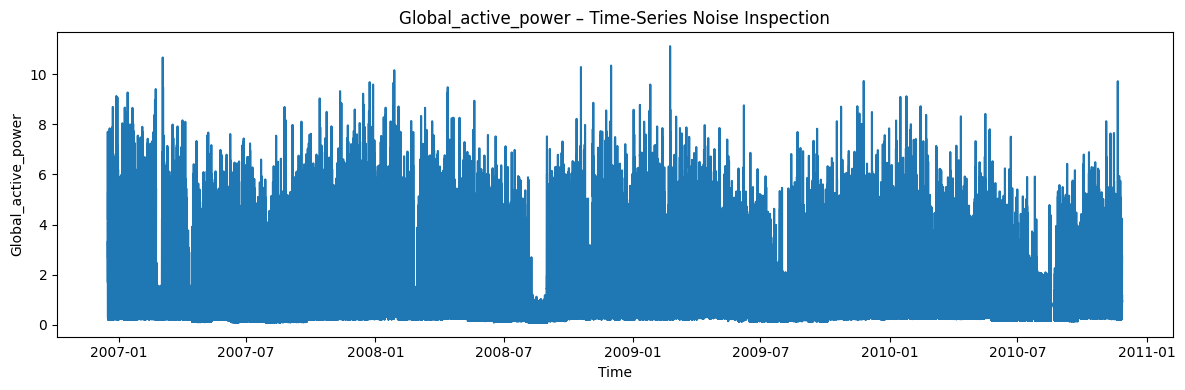

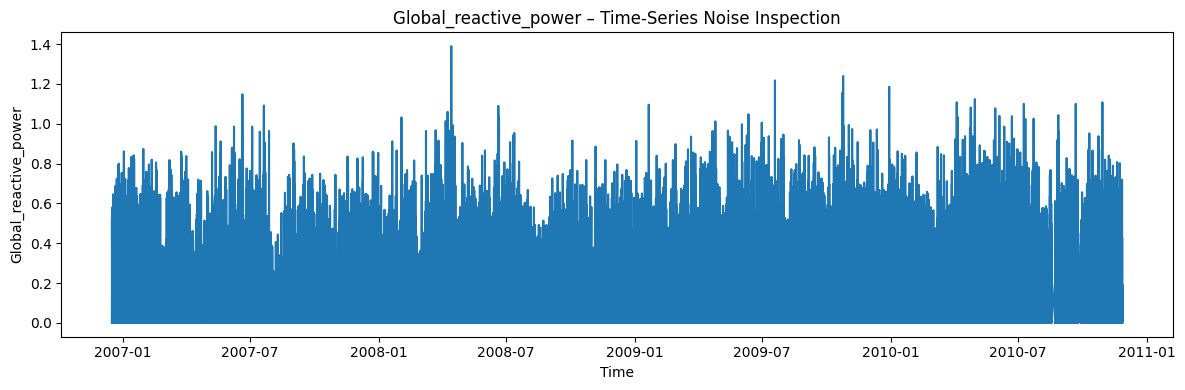

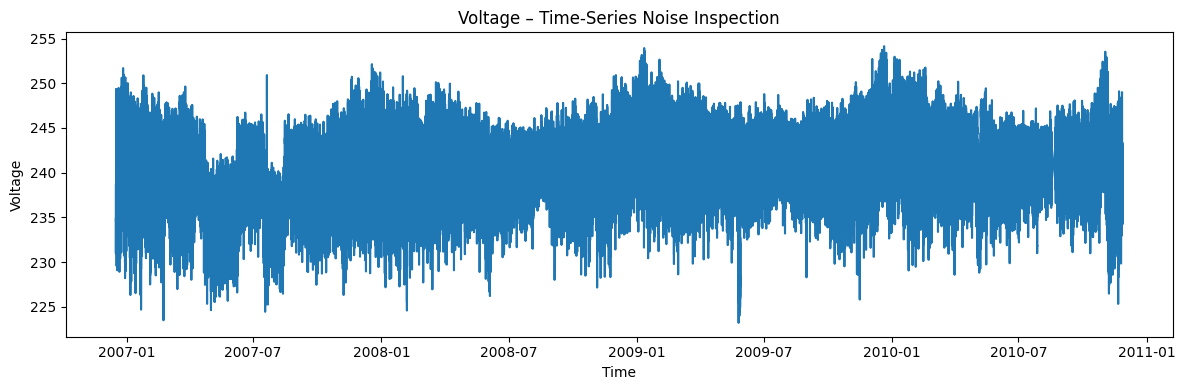

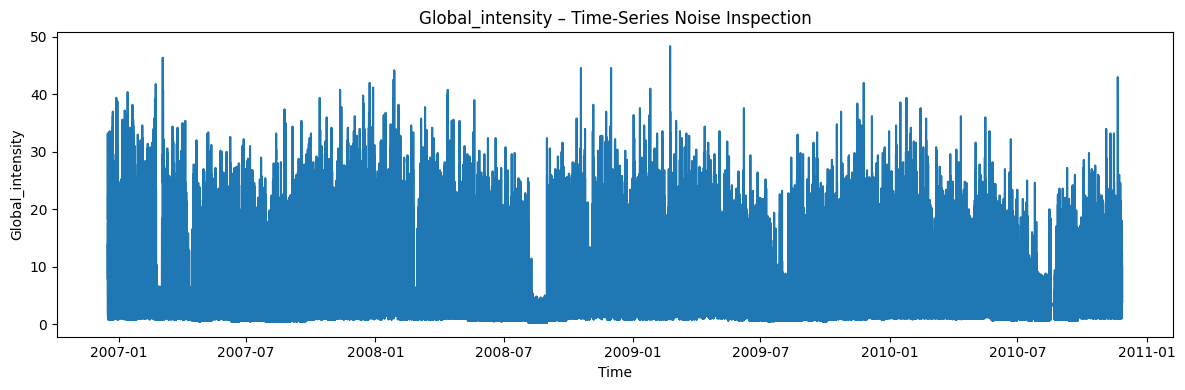

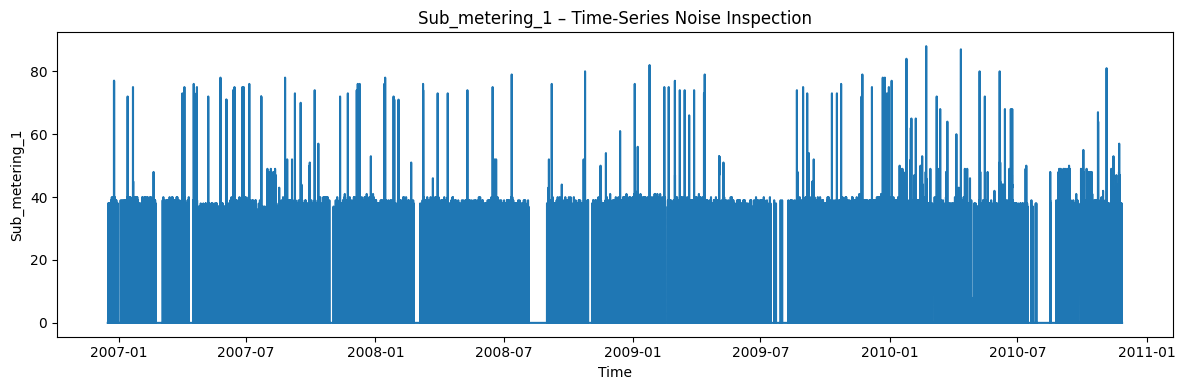

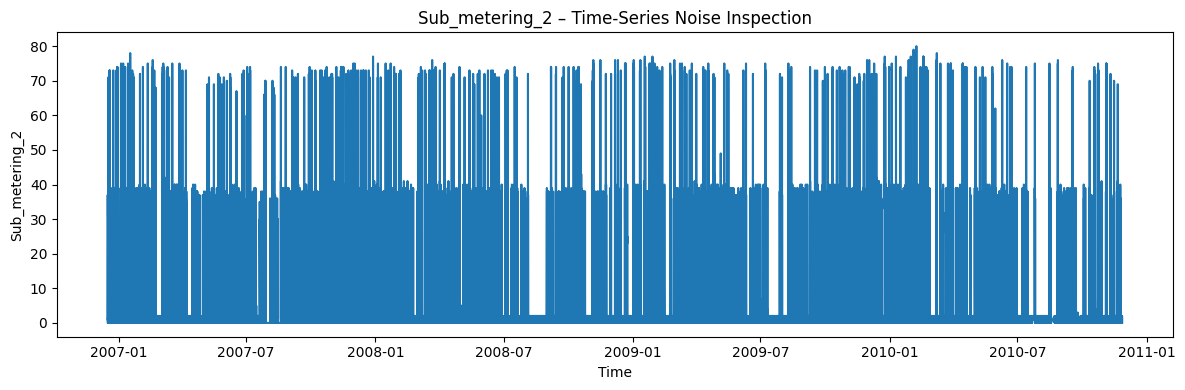

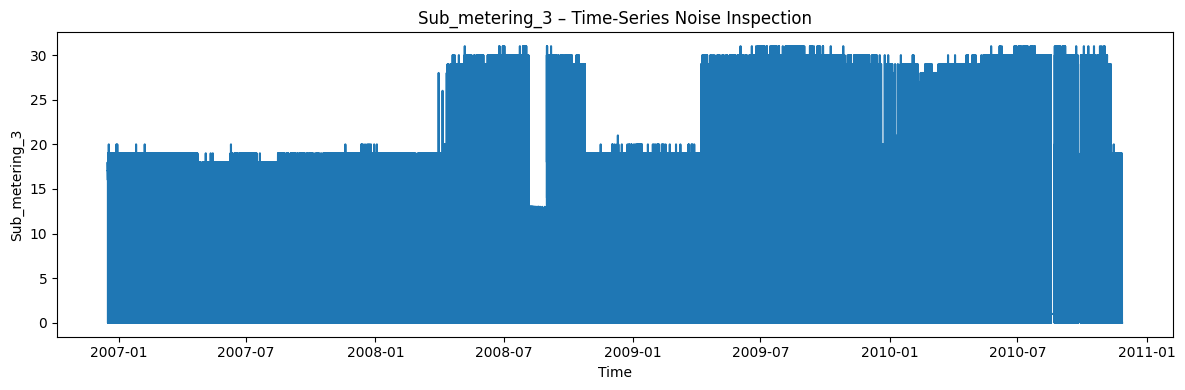

In [10]:
import matplotlib.pyplot as plt

for col in features:
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df[col])
    plt.title(f"{col} – Time-Series Noise Inspection")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [11]:
for col in features:
    df.loc[df[col] < 0, col] = None

for col in features:
    df[col] = df[col].rolling(
        window=5,
        center=True
    ).median()

df[features] = df[features].interpolate(method='time').ffill()

                 Feature      Q1       Q3     IQR  Lower_Bound  Upper_Bound  \
0    Global_active_power    0.31    1.528   1.218       -1.517        3.355   
1  Global_reactive_power    0.05    0.192   0.142       -0.163        0.405   
2                Voltage  239.01  242.850   3.840      233.250      248.610   
3       Global_intensity    1.40    6.400   5.000       -6.100       13.900   
4         Sub_metering_1    0.00    0.000   0.000        0.000        0.000   
5         Sub_metering_2    0.00    1.000   1.000       -1.500        2.500   
6         Sub_metering_3    0.00   17.000  17.000      -25.500       42.500   

   Outlier_Count  
0          92380  
1          40540  
2          52372  
3          98566  
4         171919  
5          76530  
6              0  


In [15]:
df_hourly = df[features].resample('h').mean()

df_hourly.isna().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [16]:
print("Minute-level rows:", len(df))
print("Hourly rows:", len(df_hourly))

Minute-level rows: 2075259
Hourly rows: 34589


In [17]:
df_hourly['hour'] = df_hourly.index.hour
df_hourly['day_of_week'] = df_hourly.index.dayofweek
df_hourly['month'] = df_hourly.index.month

df_hourly[['hour', 'day_of_week', 'month']].isna().sum()
df_hourly.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month
Datetime,,,,,,,,,,
2006-12-16 17:00:00,4.114294,0.215941,234.705588,17.623529,0.0,0.382353,17.000000,17,5,12
2006-12-16 18:00:00,3.638800,0.077200,234.541500,15.610000,0.0,6.083333,17.000000,18,5,12
2006-12-16 19:00:00,3.399000,0.089900,233.215000,14.493333,0.0,1.266667,16.933333,19,5,12
2006-12-16 20:00:00,3.313500,0.075800,234.080500,14.073333,0.0,0.000000,16.966667,20,5,12
2006-12-16 21:00:00,3.361900,0.075900,237.008833,14.160000,0.0,0.300000,17.000000,21,5,12


#EDA

In [18]:
df_hourly.info()
df_hourly.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: h
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Voltage                34589 non-null  float64
 3   Global_intensity       34589 non-null  float64
 4   Sub_metering_1         34589 non-null  float64
 5   Sub_metering_2         34589 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
 7   hour                   34589 non-null  int32  
 8   day_of_week            34589 non-null  int32  
 9   month                  34589 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 2.5 MB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month
count,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000
mean,1.085493,0.123209,240.836606,4.603511,1.096187,1.227896,6.550157,11.501084,2.998959,6.450548
std,0.893406,0.066661,2.999776,3.743683,3.521773,4.223588,7.273310,6.922394,2.000072,3.415879
min,0.123933,0.000000,225.842833,0.503333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.341567,0.077833,239.183500,1.510000,0.000000,0.000000,1.000000,6.000000,1.000000,3.000000
50%,0.797100,0.106800,240.976167,3.396667,0.000000,0.250000,1.950000,12.000000,3.000000,6.000000
75%,1.569800,0.148900,242.695500,6.570000,0.000000,0.516667,14.133333,18.000000,5.000000,9.000000
max,6.782300,0.772333,251.973667,29.000000,49.916667,46.516667,24.524501,23.000000,6.000000,12.000000


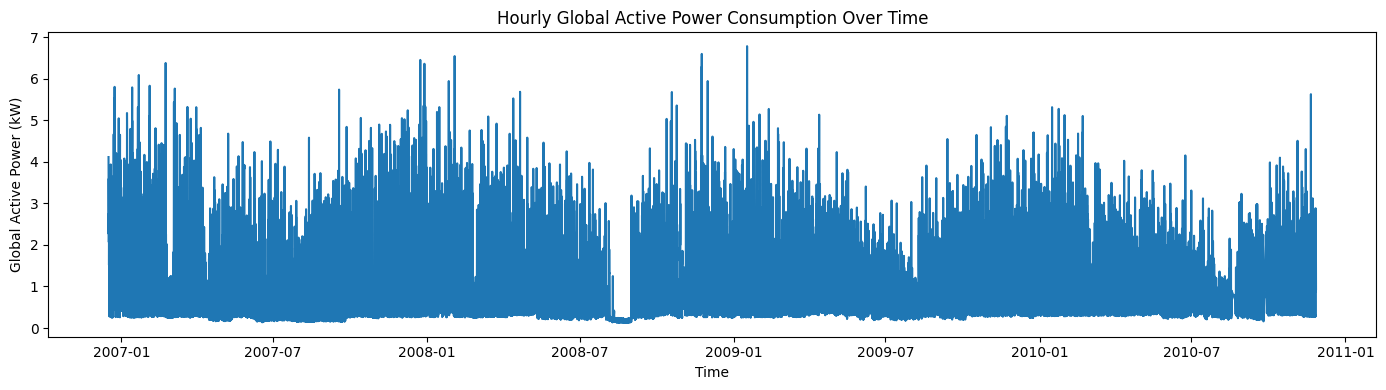

In [19]:
plt.figure(figsize=(14,4))
plt.plot(df_hourly.index, df_hourly['Global_active_power'])
plt.title('Hourly Global Active Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.tight_layout()
plt.show()

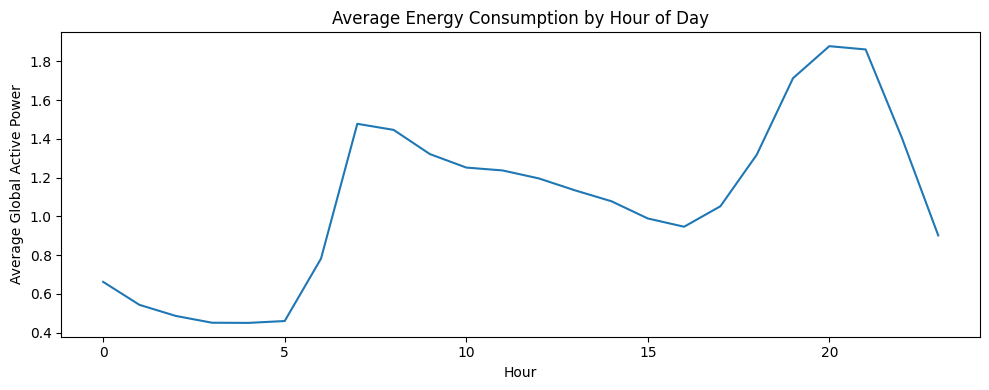

In [20]:
hourly_mean = df_hourly.groupby('hour')['Global_active_power'].mean()

plt.figure(figsize=(10,4))
hourly_mean.plot()
plt.title('Average Energy Consumption by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Global Active Power')
plt.tight_layout()
plt.show()

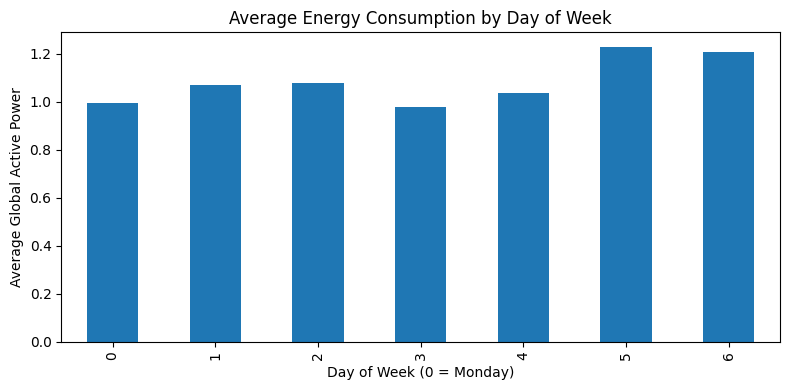

In [21]:
dow_mean = df_hourly.groupby('day_of_week')['Global_active_power'].mean()

plt.figure(figsize=(8,4))
dow_mean.plot(kind='bar')
plt.title('Average Energy Consumption by Day of Week')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('Average Global Active Power')
plt.tight_layout()
plt.show()

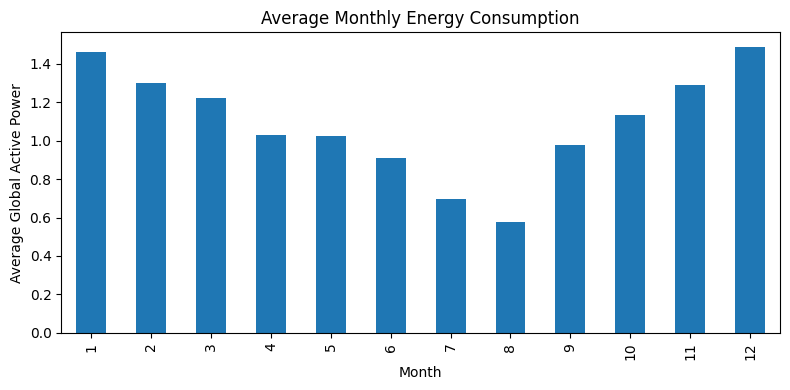

In [22]:
month_mean = df_hourly.groupby('month')['Global_active_power'].mean()

plt.figure(figsize=(8,4))
month_mean.plot(kind='bar')
plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Global Active Power')
plt.tight_layout()
plt.show()

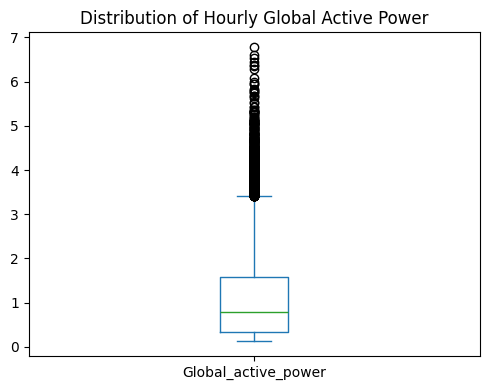

In [23]:
plt.figure(figsize=(5,4))
df_hourly['Global_active_power'].plot(kind='box')
plt.title('Distribution of Hourly Global Active Power')
plt.tight_layout()
plt.show()

In [24]:
summary = []

for col in features:
    Q1 = df_hourly[col].quantile(0.25)
    Q3 = df_hourly[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df_hourly[col] < lower_bound) | (df_hourly[col] > upper_bound)).sum()

    summary.append([col, Q1, Q3, IQR, lower_bound, upper_bound, outlier_count])

df_repor = pd.DataFrame(
    summary,
    columns=['Feature', 'Q1', 'Q3', 'IQR', 'Lower_Bound', 'Upper_Bound', 'Outlier_Count']
)

df_repor

,Feature,Q1,Q3,IQR,Lower_Bound,Upper_Bound,Outlier_Count
0,Global_active_power,0.341567,1.569800,1.228233,-1.500783,3.412150,753
1,Global_reactive_power,0.077833,0.148900,0.071067,-0.028767,0.255500,1679
2,Voltage,239.183500,242.695500,3.512000,233.915500,247.963500,1073
3,Global_intensity,1.510000,6.570000,5.060000,-6.080000,14.160000,834
4,Sub_metering_1,0.000000,0.000000,0.000000,0.000000,0.000000,4850
5,Sub_metering_2,0.000000,0.516667,0.516667,-0.775000,1.291667,2776
6,Sub_metering_3,1.000000,14.133333,13.133333,-18.700000,33.833333,0
